In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import os

In [3]:
data_dir = "/kaggle/input/dog-vs-cat/animals"

Classes in the dataset: ['dog', 'cat']


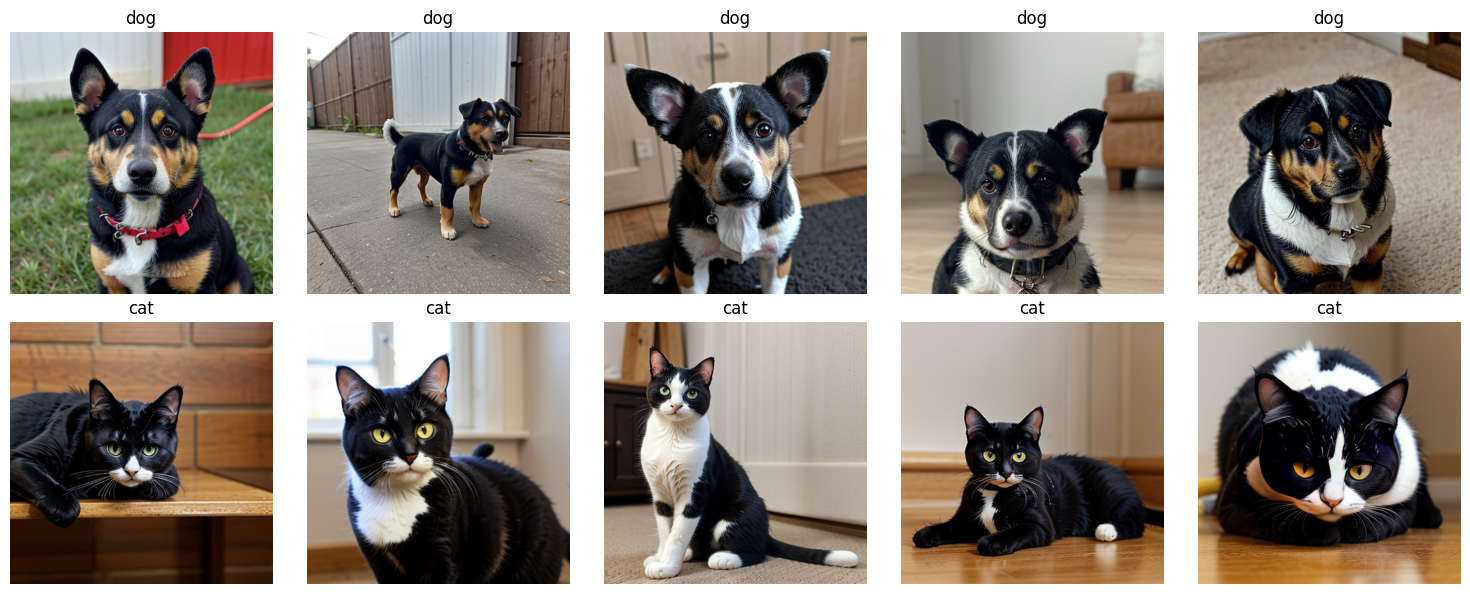

In [11]:
import os
import matplotlib.pyplot as plt
from PIL import Image

data_dir = "/kaggle/input/dog-vs-cat/animals"

classes = os.listdir(data_dir)
print(f"Classes in the dataset: {classes}")


fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()


for i, class_name in enumerate(classes):
    class_path = os.path.join(data_dir, class_name)
    image_files = os.listdir(class_path)
    for j in range(5):  
        img_path = os.path.join(class_path, image_files[j])
        img = Image.open(img_path)
        axes[i * 5 + j].imshow(img)
        axes[i * 5 + j].axis("off")
        axes[i * 5 + j].set_title(class_name)

plt.tight_layout()
plt.show()


In [36]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)


In [39]:
valid_datagen = ImageDataGenerator(rescale=1.0 / 255.0)


In [40]:
train_ds = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),  # Resize images
    batch_size=32,
    class_mode='binary',
    subset='training'  # Training data
)

val_ds = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Validation data
)

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [41]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10  # You can increase epochs for better results
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 968ms/step - accuracy: 0.5617 - loss: 0.7345 - val_accuracy: 0.6050 - val_loss: 0.6552
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 903ms/step - accuracy: 0.6647 - loss: 0.6426 - val_accuracy: 0.6650 - val_loss: 0.6448
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 893ms/step - accuracy: 0.6971 - loss: 0.5549 - val_accuracy: 0.7200 - val_loss: 0.5340
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 898ms/step - accuracy: 0.7688 - loss: 0.5063 - val_accuracy: 0.8150 - val_loss: 0.4479
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 901ms/step - accuracy: 0.8083 - loss: 0.4390 - val_accuracy: 0.8600 - val_loss: 0.3166
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 898ms/step - accuracy: 0.8222 - loss: 0.3931 - val_accuracy: 0.7700 - val_loss: 0.4677
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 884ms/step - accuracy: 0.8464 - loss: 0.3711 - val_accuracy: 0.9350 - val_loss: 0.2259
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 938ms/step - accuracy: 0.9222 - loss: 0.2325 - val_accu

In [44]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_ds = test_datagen.flow_from_directory(
    data_dir,  # Same path for simplicity
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # No shuffle for evaluation
)

Found 1000 images belonging to 2 classes.


In [51]:
test_loss, test_acc = model.evaluate(test_ds)
print(f'Test accuracy: {test_acc:.4f}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 499ms/step - accuracy: 0.9882 - loss: 0.0430
Test accuracy: 0.9820


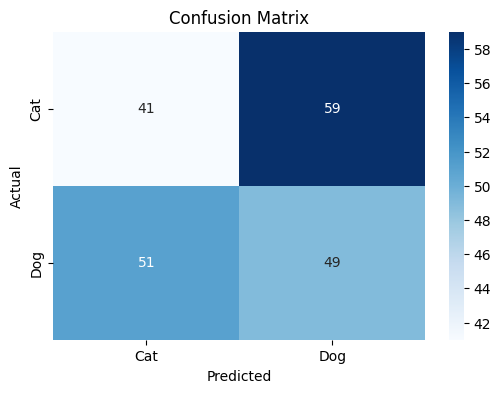

In [48]:
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

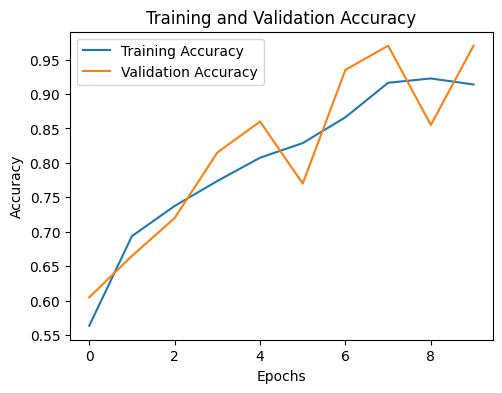

In [49]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

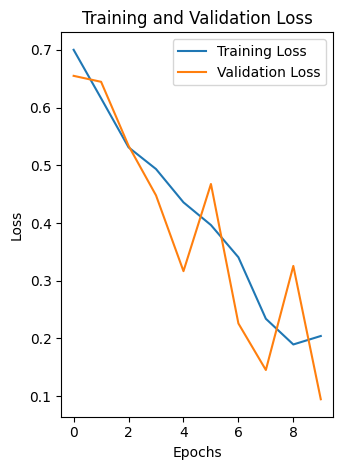

In [50]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()